In [5]:
import numpy as np

from PIL import Image
from ietk import util
from ietk import methods
from matplotlib import pyplot as plt

In [161]:
name = 32
index = 0

image_path = '/Users/zhiweideng/Desktop/NICR/VesselAnalysis/EyeVessel/DRIVE/train/images/{}_training.tif'.format(name)
mask_path = '/Users/zhiweideng/Desktop/NICR/VesselAnalysis/EyeVessel/DRIVE/train/mask/{}_training_mask.gif'.format(name)
label_path = '/Users/zhiweideng/Desktop/NICR/VesselAnalysis/EyeVessel/DRIVE/train/1st_manual/{}_manual1.gif'.format(name)

image, mask, label = Image.open(image_path), Image.open(mask_path), Image.open(label_path)

In [162]:
I = np.array(image) * 1.0 / 255.0
# I, fg = util.center_crop_and_get_foreground_mask(I)

(584, 565, 3)


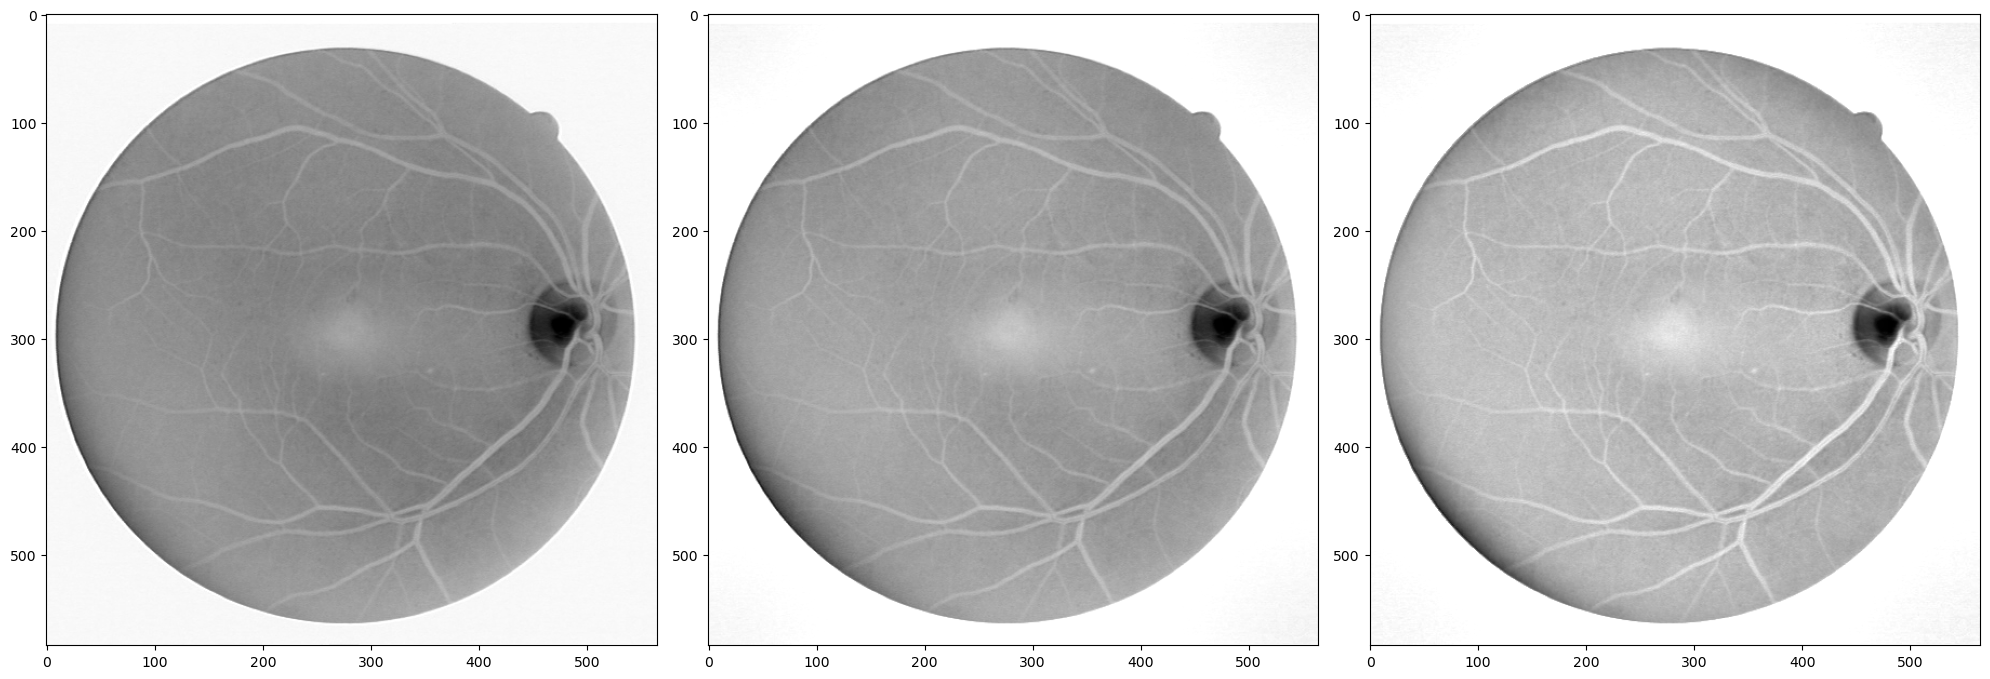

In [166]:
enhanced_img = np.clip(methods.brighten_darken(I, 'A+B+X'), a_min=0.0, a_max=None)
enhanced_img2 = np.clip(methods.sharpen(enhanced_img), a_min=0.0, a_max=None)

enhanced_img = 2 * (enhanced_img - enhanced_img.min()) / (enhanced_img.max() - enhanced_img.min()) - 1.0
enhanced_img2 = 2 * (enhanced_img2 - enhanced_img2.min()) / (enhanced_img2.max() - enhanced_img2.min()) -1.0

# plot results
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
ax1.imshow(-I[..., 1], cmap='gray')
ax2.imshow(-enhanced_img[..., 1], cmap='gray')
ax3.imshow(-enhanced_img2[..., 1], cmap='gray')
f.tight_layout()
print(I.shape)